<h1>import from a python module that i have written </h1>
<p>if you want to import from the separate module that i have written the following cell is suitable for you</p>
<p>in the following cell i have used static method read_csv_file from DataframeHandler module to read train dataset and test dataset then dropeed  </p>

In [ ]:
<h1>Step1: reading, preprocessing and merging train and test dataset</h1>

<p>in the following cell i have used static method read_csv_file from DataframeHandler module to read train dataset and test dataset then cleaned data by removing all nan values using dropna() then merged both train and test dataset into single dataframe named df so basically df is combination of train and test dataset without any nan values  </p>

In [1]:
from DataframeHandler import DataFrameHandler as dfh
import pandas as pd


# Read the training dataset
file_path_train = "drugLibTrain_raw.csv"
df_train = dfh.read_csv_file(file_path_train)

# Clean the training dataset


# Read the training dataset
file_path_test = "drugLibTest_raw.csv"
df_test = dfh.read_csv_file(file_path_test)

# Clean the training dataset
df_test = df_test.drop(columns='Unnamed: 0')


# Merge the datasets along columns
df = pd.concat([df_train, df_test], axis=0)
#df.to_csv("traintestmix.csv",index=False) uncomment this if you want to keep a csv file of combined dataset


<h1>data analysis</h1>
<p>in Dataframe Handler i have created a static method named describe_data which handles all data viewing tasks as table inlcuding : number of rows, number of columns,number of null values and data description (one for All!) </p>

In [2]:
from DataframeHandler import DataFrameHandler as dfh


print(dfh.describe_data(df)) 





,# Column,Column name,Non-Null Count,Missing,Dtype
0,#,Column,Non-Null,Count,Dtype
1,---,------,--------------,-----,
2,0,Unnamed:,0,3107,non-null
3,1,urlDrugName,4143,non-null,object
4,2,rating,4143,non-null,int64
5,3,effectiveness,4143,non-null,object
6,4,sideEffects,4143,non-null,object
7,5,condition,4142,non-null,object
8,6,benefitsReview,4143,non-null,object
9,7,sideEffectsReview,4141,non-null,object



Number of rows and columns:
Number of rows: 4143
Number of columns: 9

DataFrame Description:


,Unnamed: 0,rating
count,3107.000000,4143.000000
mean,2080.607016,6.946416
std,1187.998828,2.948868
min,0.000000,1.000000
25%,1062.500000,5.000000
50%,2092.000000,8.000000
75%,3092.500000,9.000000
max,4161.000000,10.000000



Sum of null values in each column:


,Null Counts
Unnamed: 0,1036
urlDrugName,0
rating,0
effectiveness,0
sideEffects,0
condition,1
benefitsReview,0
sideEffectsReview,2
commentsReview,8


None


<h1>Preprocessing</h1>
<p>when you see the statistical properties of the dataframe you can see that there is a column named Unnamed: 0 with with no values so it must be dropped and there are less than 20 nan values so there wont be a problem if we remove them</p>

In [3]:
#since there are few nan values and few one wont affect our dataset we remove them
df = df.dropna()
df = df.drop(columns='Unnamed: 0') 

print(dfh.describe_data(df),df.head()) # after removing empty and nan values we check the changes  we use df.head() to have an intution on columns and determining categorical columns for eda and machine larning task

#%%

,# Column,Column name,Non-Null Count,Missing,Dtype
0,#,Column,Non-Null,Count,Dtype
1,---,------,--------------,-----,
2,0,urlDrugName,3096,non-null,object
3,1,rating,3096,non-null,int64
4,2,effectiveness,3096,non-null,object
5,3,sideEffects,3096,non-null,object
6,4,condition,3096,non-null,object
7,5,benefitsReview,3096,non-null,object
8,6,sideEffectsReview,3096,non-null,object
9,7,commentsReview,3096,non-null,object



Number of rows and columns:
Number of rows: 3096
Number of columns: 8

DataFrame Description:


,rating
count,3096.000000
mean,7.010659
std,2.936630
min,1.000000
25%,5.000000
50%,8.000000
75%,9.000000
max,10.000000



Sum of null values in each column:


,Null Counts
urlDrugName,0
rating,0
effectiveness,0
sideEffects,0
condition,0
benefitsReview,0
sideEffectsReview,0
commentsReview,0


None


<h1>check uniuque values for categorical columns</h1>
<p>while working with dataset it is necessary to check labels of categorical data we we used df.head() we realized that the columns of effectiveness, sideEffects are categorical so we need to check the unique values of each column</p>

                                 

In [6]:

print(f"\n{df['effectiveness'].unique()}\n") #we need to check unique labels for effectiveness column and sideeffects an conditions then check which encoder is suitable for them
print(f"\n{df['sideEffects'].unique()}\n")



['Highly Effective' 'Marginally Effective' 'Ineffective'
 'Considerably Effective' 'Moderately Effective']


['Mild Side Effects' 'Severe Side Effects' 'No Side Effects'
 'Extremely Severe Side Effects' 'Moderate Side Effects']



<h1>check unique values for categorical columns</h1>
<p>while working with dataset it is necessary to check labels of categorical data we we used df.head() we realized that the columns of effectiveness, sideEffects are categorical so we need to check the unique values of each column</p>

                                 

<h1>encoding categorical data</h1>
<p>now that we have retrieved unique values of our categorical columns we better encode them for statistical tasks and sentiment analysis in this situation for both columns we use ordinal data since there is an orderinal relationship between them we have created a static method inside Dataframehandler module for ordinally encoding columns</p>


                                 

In [8]:
"""effectiveness we better use ordinal encoder because the categories have some orders in them from ineffective to highly effective

for sideEffects we also need to use ordinal encoders
we dont consider condition as our variables because we cannot find specific pattern





here we are going to encode our categorical columns
"""
ordered_effectiveness = ['Ineffective', 'Marginally Effective', 'Moderately Effective',
                         'Considerably Effective', 'Highly Effective']
ordered_sideEffects = ['No Side Effects', 'Mild Side Effects', 'Moderate Side Effects', 'Severe Side Effects',
                       'Extremely Severe Side Effects']

allCats = [ordered_sideEffects, ordered_effectiveness]

df = dfh.encode_ordinal_columns(df, ['sideEffects', 'effectiveness'],
                                       ['sideEffects_encoded', 'effectiveness_encoded'], allCats)



<h2>Step two : checking correlation between rating,effectiveness and sideeffects</h2>
<p>we assume that effectiveness of drug and sideeffects on people can impact their rating value so we better check , we have created a static method in dataframe handler for correlation</p>


In [ ]:
result = dfh.check_correlation(df, ['sideEffects_encoded', 'effectiveness_encoded', 'rating'])
result

<h2>Correlation result: effectiveness can increase rating and sideEffects can decrease rating</h2>
<p>the correlation between  and rating was near 1 </p>


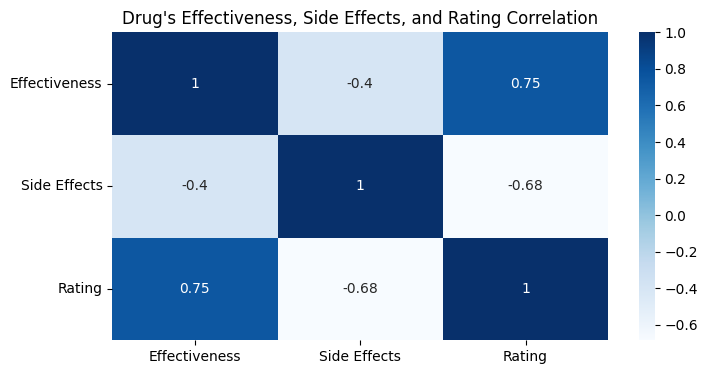

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
heatmap = sns.heatmap(df[['effectiveness_encoded','sideEffects_encoded','rating']].corr(), annot=True, cmap='Blues', cbar=True)

# Custom x and y labels
x_labels = ['Effectiveness', 'Side Effects', 'Rating']
y_labels = ['Effectiveness', 'Side Effects', 'Rating']

# Set the x and y labels
heatmap.set_xticklabels(x_labels, rotation=0)
heatmap.set_yticklabels(y_labels, rotation=0)

plt.title("Drug's Effectiveness, Side Effects, and Rating Correlation")

plt.show()


<h2>Pivot tables</h2>
<p>the correlation between  and rating was near 1 </p>


In [14]:
# This pivot table shows the sum of ratings for each combination of effectiveness and side effects.
df.pivot_table(index='effectiveness', columns='sideEffects', values='rating', aggfunc='sum')



sideEffects,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects
effectiveness,,,,,
Considerably Effective,66,2889,1319,2150,356
Highly Effective,73,4415,1590,5119,472
Ineffective,79,53,91,51,108
Marginally Effective,26,167,148,141,150
Moderately Effective,40,773,665,533,231


In [15]:

# This pivot table shows the count of reviews for each combination of effectiveness and side effects.
df.pivot_table(index='effectiveness', columns='sideEffects', values='commentsReview', aggfunc='count')

sideEffects,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects
effectiveness,,,,,
Considerably Effective,30,360,196,254,85
Highly Effective,27,481,205,528,86
Ineffective,75,20,46,29,75
Marginally Effective,17,37,43,34,55
Moderately Effective,26,119,122,80,66


In [ ]:
<h2>Step 3: Sentiment Analysis</h2>
<p>we do sentiment analysis using nltk package using 3 different lexican: vader,sentiwordnet and textblob</p>


In [ ]:

import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the Sentiment Analyzer
sia = SentimentIntensityAnalyzer()





df['sideEffectsSentiment'] = df['sideEffectsReview'].apply(lambda x: sia.polarity_scores(x))
df['commentsSentiment'] = df['commentsReview'].apply(lambda x: sia.polarity_scores(x))
#df['sentiment_comment'] = df['commentsReview'].apply(lambda x: sia.polarity_scores(x))


df['sideEffectsSentiment'][1],df['commentsSentiment'][1]




In [ ]:
import pandas as pd
import nltk
from nltk.corpus import sentiwordnet as swn

# Ensure that the necessary NLTK data files are available
nltk.download('punkt')
nltk.download('sentiwordnet')

def analyze_sentiwordnet(text):
    words = nltk.word_tokenize(text)
    pos_score = 0
    neg_score = 0
    for word in words:
        synsets = list(swn.senti_synsets(word))
        if synsets:
            synset = synsets[0]
            pos_score += synset.pos_score()
            neg_score += synset.neg_score()
    
    total_score = pos_score + neg_score
    if total_score > 0:
        pos_ratio = pos_score / total_score
        neg_ratio = neg_score / total_score
        neu_ratio = 1 - pos_ratio - neg_ratio
    else:
        pos_ratio = 0
        neg_ratio = 0
        neu_ratio = 1
    
    return {'pos': pos_ratio, 'neg': neg_ratio, 'neu': neu_ratio}

# Example DataFrame


# Apply the analysis to the DataFrame
df['sideEffectsSentiment'] = df['sideEffectsReview'].apply(lambda x: analyze_sentiwordnet(x))
df['commentsSentiment'] = df['commentsReview'].apply(lambda x: analyze_sentiwordnet(x))

df['commentsSentiment'][101], df['commentsReview'][101]

In [ ]:
import pandas as pd
import nltk
from textblob import TextBlob

# Ensure that the necessary NLTK data files are available
nltk.download('punkt')

def analyze_textblob(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    
    pos_score = max(sentiment.polarity, 0)
    neg_score = abs(min(sentiment.polarity, 0))
    neu_score = 1 - pos_score - neg_score
    
    return {'pos': pos_score, 'neg': neg_score, 'neu': neu_score}

# Apply the analysis to the DataFrame
df['sideEffectsSentiment'] = df['sideEffectsReview'].apply(lambda x: analyze_textblob(x))
df['commentsSentiment'] = df['commentsReview'].apply(lambda x: analyze_textblob(x))

# Example output (printing the sentiment and review of the 101st entry in commentsReview)
print(df['commentsSentiment'][30], df['commentsReview'][30])
